# MSDS 7331 - Mini-Project: SVM&LR Classification
## Johnson Ekedum, Ekaterina Pirogova, Victor Yim
### 10/8/2017


## SVM and Logistic Regression Modeling
• [50 points] Create a logistic regression model and a support vector machine model for the
classification task involved with your dataset. Assess how well each model performs (use
80/20 training/testing split for your data). Adjust parameters of the models to make them
more accurate. If your dataset size requires the use of stochastic gradient descent, then
linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic
regression and linear support vector machines. For many problems, SGD will be required in
order to train the SVM model in a reasonable timeframe. 

• [10 points] Discuss the advantages of each model for each classification task. Does one type
of model offer superior performance over another in terms of prediction accuracy? In terms of
training time or efficiency? Explain in detail.

• [30 points] Use the weights from logistic regression to interpret the importance of different
features for the classification task. Explain your interpretation in detail. Why do you think
some variables are more important?

• [10 points] Look at the chosen support vectors for the classification task. Do these provide
any insight into the data? Explain. If you used stochastic gradient descent (and therefore did
not explicitly solve for support vectors), try subsampling your data to train the SVC model—
then analyze the support vectors from the subsampled dataset.

## Data Preparation:
We leveraged the data preparation work that we have already done from Lab 1 and applied it to this analysis.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
diab = pd.read_csv('C:/Users/Victor Yim/Downloads/diabetic_data.csv')
pd.options.mode.chained_assignment = None #supress warnings
# Replace missing values to NaN
diab = diab.replace(to_replace='?',value=np.nan)
diab["race"] = pd.Categorical(diab.race)
diab["code_race"] = diab.race.cat.codes
diab.ix[diab['code_race']== -1, ["code_race"]]=np.nan

from sklearn.preprocessing import Imputer
import numpy as np
imp=Imputer(missing_values="NaN", strategy="most_frequent")
imp.fit(diab[["code_race"]])
diab["code_race"]=imp.transform(diab[["code_race"]]).ravel()

###Imputation gave 2: therefore, we'll replace with caucasians
diab.ix[diab['race'].isnull(),["race"]]="Caucasian"
diab['gender'] = diab['gender'].replace(to_replace='Unknown/Invalid', value='Female')


#create columns
#weight_status
diab['weight_status']=np.nan #empty column
diab['weight_status'][diab['weight'].isnull()] ="Not measured"
diab['weight_status'][diab['weight'].notnull()] ="Measured"
#readmittance
pd.options.mode.chained_assignment = None #supress warnings
diab['readmitted'][diab['readmitted']==">30"]="NO"
diab['readmitted_Group']=np.nan
diab['readmitted_Group'][diab['readmitted']=="NO"]  = 0
diab['readmitted_Group'][diab['readmitted']=="<30"] = 1
diab["readmitted_Group"]=diab["readmitted_Group"].astype('int64')

diag_num=["diag_1","diag_2","diag_3"]
#replace diagnosis containing E and V as -1 and -2
diab[diag_num] = diab[diag_num].replace({'E':'-1'}, regex=True)
diab[diag_num] = diab[diag_num].replace({'V':'-2'}, regex=True)

diab[diag_num] = diab[diag_num].astype(np.float)
#bin by diagnosis type
pd.options.mode.chained_assignment = None #supress warnings
#diagnosis 1
diab['diag_1_cat']=np.nan #empty column
diab['diag_1_cat'][(diab['diag_1']>=-2000)&(diab['diag_1']<1)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=280)&(diab['diag_1']<=389)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=630)&(diab['diag_1']<=679)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=740)&(diab['diag_1']<=759)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=1)&(diab['diag_1']<250)] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=251)&(diab['diag_1']<280)] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=790)&(diab['diag_1']<=799)|((diab['diag_1']==780))|((diab['diag_1']==781))
                  |((diab['diag_1']==784))] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=680)&(diab['diag_1']<=709)|((diab['diag_1']==782))]="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=250)&(diab['diag_1']<251)] ="Diabeties"
diab['diag_1_cat'][(diab['diag_1']>=390)&(diab['diag_1']<=459)|((diab['diag_1']==785))] ="Circulatory"
diab['diag_1_cat'][(diab['diag_1']>=460)&(diab['diag_1']<=519)|((diab['diag_1']==786))] ="Respiratory"
diab['diag_1_cat'][(diab['diag_1']>=520)&(diab['diag_1']<=579)|((diab['diag_1']==787))] ="Digestive"
diab['diag_1_cat'][(diab['diag_1']>=800)&(diab['diag_1']<=999)] ="Injury"
diab['diag_1_cat'][(diab['diag_1']>=710)&(diab['diag_1']<=739)] ="Musculoskeletal"
diab['diag_1_cat'][(diab['diag_1']>=580)&(diab['diag_1']<=629)|((diab['diag_1']==788))] ="Genitourinary"
diab['diag_1_cat'][diab['diag_1'].isnull()] ="No diagnosis"
#diagnosis 2
diab['diag_2_cat']=np.nan #empty column
diab['diag_2_cat'][(diab['diag_2']>=-2000)&(diab['diag_2']<1)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=280)&(diab['diag_2']<=389)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=630)&(diab['diag_2']<=679)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=740)&(diab['diag_2']<=759)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=1)&(diab['diag_2']<250)] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=251)&(diab['diag_2']<280)] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=790)&(diab['diag_2']<=799)|((diab['diag_2']==780))|((diab['diag_2']==781))
                  |((diab['diag_2']==784))] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=680)&(diab['diag_2']<=709)|((diab['diag_2']==782))]="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=250)&(diab['diag_2']<251)] ="Diabeties"
diab['diag_2_cat'][(diab['diag_2']>=390)&(diab['diag_2']<=459)|((diab['diag_2']==785))] ="Circulatory"
diab['diag_2_cat'][(diab['diag_2']>=460)&(diab['diag_2']<=519)|((diab['diag_2']==786))] ="Respiratory"
diab['diag_2_cat'][(diab['diag_2']>=520)&(diab['diag_2']<=579)|((diab['diag_2']==787))] ="Digestive"
diab['diag_2_cat'][(diab['diag_2']>=800)&(diab['diag_2']<=999)] ="Injury"
diab['diag_2_cat'][(diab['diag_2']>=710)&(diab['diag_2']<=739)] ="Musculoskeletal"
diab['diag_2_cat'][(diab['diag_2']>=580)&(diab['diag_2']<=629)|((diab['diag_2']==788))] ="Genitourinary"
diab['diag_2_cat'][diab['diag_2'].isnull()] ="No diagnosis"
#diagnosis 3
diab['diag_3_cat']=np.nan #empty column
diab['diag_3_cat'][(diab['diag_3']>=-2000)&(diab['diag_3']<1)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=280)&(diab['diag_3']<=389)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=630)&(diab['diag_3']<=679)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=740)&(diab['diag_3']<=759)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=1)&(diab['diag_3']<250)] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=251)&(diab['diag_3']<280)] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=790)&(diab['diag_3']<=799)|((diab['diag_3']==780))|((diab['diag_3']==781))
                  |((diab['diag_3']==784))] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=680)&(diab['diag_3']<=709)|((diab['diag_3']==782))]="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=250)&(diab['diag_3']<251)] ="Diabeties"
diab['diag_3_cat'][(diab['diag_3']>=390)&(diab['diag_3']<=459)|((diab['diag_3']==785))] ="Circulatory"
diab['diag_3_cat'][(diab['diag_3']>=460)&(diab['diag_3']<=519)|((diab['diag_3']==786))] ="Respiratory"
diab['diag_3_cat'][(diab['diag_3']>=520)&(diab['diag_3']<=579)|((diab['diag_3']==787))] ="Digestive"
diab['diag_3_cat'][(diab['diag_3']>=800)&(diab['diag_3']<=999)] ="Injury"
diab['diag_3_cat'][(diab['diag_3']>=710)&(diab['diag_3']<=739)] ="Musculoskeletal"
diab['diag_3_cat'][(diab['diag_3']>=580)&(diab['diag_3']<=629)|((diab['diag_3']==788))] ="Genitourinary"
diab['diag_3_cat'][diab['diag_3'].isnull()] ="No diagnosis"
#droping original variables
to_drop=['diag_1','diag_2','diag_3']
diab.drop(to_drop,axis=1, inplace = True)

diab["med_cat"]="Other"
diab["med_cat"][(diab["insulin"]=="Up")|(diab["insulin"]=="Down")|(diab["insulin"]=="Steady")]="Insulin"


diab['encounter_id'] = diab['encounter_id'].astype(object)
diab['patient_nbr'] = diab['patient_nbr'].astype(object)
diab['admission_type_id'] = diab['admission_type_id'].astype(object)
diab['discharge_disposition_id'] = diab['discharge_disposition_id'].astype(object)
diab['admission_source_id'] = diab['admission_source_id'].astype(object)
diab['race'] = diab['race'].astype(object)
diab["A1Cresult"] = diab["A1Cresult"].astype(object)
diab["age"] = diab["age"].astype(object)
diab['max_glu_serum'] = diab['max_glu_serum'].astype(object)
diab['gender'] = diab['gender'].astype(object)
diab['diabetesMed'] = diab['diabetesMed'].astype(object)
diab['change'] = diab['change'].astype(object)
# insert dictionary
admission_type_id_dict = {"1" : "Emergency",
"2" : "Urgent",
"3" : "Elective",
"4" : "Newborn",
"5" : "Not Available",
"6" : "NULL",
"7" : "Trauma Center",
"8" : "Not Mapped"}


discharge_disposition_id_dict= {"1" : "Discharged to home",
"2" : "Discharged/transferred to another short term hospital",
"3" : "Discharged/transferred to SNF",
"4" : "Discharged/transferred to ICF",
"5" : "Discharged/transferred to another type of inpatient care institution",
"6" : "Discharged/transferred to home with home health service",
"7" : "Left AMA",
"8" : "Discharged/transferred to home under care of Home IV provider",
"9" : "Admitted as an inpatient to this hospital",
"10" : "Neonate discharged to another hospital for neonatal aftercare",
"11" : "Expired",
"12" : "Still patient or expected to return for outpatient services",
"13" : "Hospice / home",
"14" : "Hospice / medical facility",
"15" : "Discharged/transferred within this institution to Medicare approved swing bed",
"16" : "Discharged/transferred/referred another institution for outpatient services",
"17" : "Discharged/transferred/referred to this institution for outpatient services",
"18" : "NULL",
"19" : "Expired at home. Medicaid only, hospice.",
"20" : "Expired in a medical facility. Medicaid only, hospice.",
"21" : "Expired, place unknown. Medicaid only, hospice.",
"22" : "Discharged/transferred to another rehab fac including rehab units of a hospital .",
"23" : "Discharged/transferred to a long term care hospital.",
"24" : "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
"25" : "Not Mapped",
"26" : "Unknown/Invalid",
"30" : "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",
"27" : "Discharged/transferred to a federal health care facility.",
"28" : "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
"29" : "Discharged/transferred to a Critical Access Hospital (CAH)."}


discharge_disposition_id_dict= {"1" : " Physician Referral",
"2" : "Clinic Referral",
"3" : "HMO Referral",
"4" : "Transfer from a hospital",
"5" : " Transfer from a Skilled Nursing Facility (SNF)",
"6" : " Transfer from another health care facility",
"7" : " Emergency Room",
"8" : " Court/Law Enforcement",
"9" : " Not Available",
"10" : " Transfer from critial access hospital",
"11" : "Normal Delivery",
"12" : " Premature Delivery",
"13" : " Sick Baby",
"14" : " Extramural Birth",
"15" : "Not Available",
"17" : "NULL",
"18" : " Transfer From Another Home Health Agency",
"19" : "Readmission to Same Home Health Agency",
"20" : " Not Mapped",
"21" : "Unknown/Invalid",
"22" : " Transfer from hospital inpt/same fac reslt in a sep claim",
"23" : " Born inside this hospital",
"24" : " Born outside this hospital",
"25" : " Transfer from Ambulatory Surgery Center",
"26" : "Transfer from Hospice"}

diab['med_increase']=0
#then make readmittance binary variable
diab['med_increase'][(diab['metformin']=="Up")|(diab['repaglinide']=="Up")|(diab['nateglinide']=="Up")
                    |(diab['metformin-rosiglitazone']=="Up")|(diab['metformin-pioglitazone']=="Up")
                     |(diab['chlorpropamide']=="Up")|(diab['glimepiride']=="Up")
                     |(diab['acetohexamide']=="Up")|(diab['glipizide']=="Up")|(diab['glyburide']=="Up")
                     |(diab['tolbutamide']=="Up")|(diab['pioglitazone']=="Up")|(diab['rosiglitazone']=="Up")
                     |(diab['acarbose']=="Up")|(diab['miglitol']=="Up")|(diab['troglitazone']=="Up")|(diab['tolazamide']=="Up")
                    |(diab['insulin']=="Up")|(diab['glyburide-metformin']=="Up")|(diab['glipizide-metformin']=="Up")] =1
#drop columns
diab.drop(["payer_code"],axis=1, inplace = True)
diab.drop(["medical_specialty"],axis=1, inplace = True)
diab.drop(["examide"],axis=1, inplace = True)
diab.drop(["citoglipton"],axis=1, inplace = True)
diab.drop(['weight'],axis=1, inplace = True)

## Additional Preprocessing of data
Creating binary variables for all the medication

In [3]:
diab['metformin-rosiglitazoneBinary']=1
diab['metformin-rosiglitazoneBinary'][diab["metformin-rosiglitazone"]=="No"]=0
diab['metformin-pioglitazoneBinary']=1
diab['metformin-pioglitazoneBinary'][diab["metformin-pioglitazone"]=="No"]=0
diab['glimepiride-pioglitazoneBinary']=1
diab['glimepiride-pioglitazoneBinary'][diab["glimepiride-pioglitazone"]=="No"]=0
diab['glipizide-metforminBinary']=1
diab['glipizide-metforminBinary'][diab["glipizide-metformin"]=="No"]=0
diab['glyburide-metforminBinary']=1
diab['glyburide-metforminBinary'][diab["glyburide-metformin"]=="No"]=0
diab['insulinBinary']=1
diab['insulinBinary'][diab["insulin"]=="No"]=0
diab['tolazamideBinary']=1
diab['tolazamideBinary'][diab["tolazamide"]=="No"]=0
diab['troglitazoneBinary']=1
diab['troglitazoneBinary'][diab["troglitazone"]=="No"]=0
diab['miglitolBinary']=1
diab['miglitolBinary'][diab["miglitol"]=="No"]=0
diab['acarboseBinary']=1
diab['acarboseBinary'][diab["acarbose"]=="No"]=0
diab['rosiglitazoneBinary']=1
diab['rosiglitazoneBinary'][diab["rosiglitazone"]=="No"]=0
diab['pioglitazoneBinary']=1
diab['pioglitazoneBinary'][diab["pioglitazone"]=="No"]=0
diab['metforminBinary']=1
diab['metforminBinary'][diab["metformin"]=="No"]=0
diab['repaglinideBinary']=1
diab['repaglinideBinary'][diab["repaglinide"]=="No"]=0
diab['nateglinideBinary']=1
diab['nateglinideBinary'][diab["nateglinide"]=="No"]=0
diab['chlorpropamideBinary']=1
diab['chlorpropamideBinary'][diab["chlorpropamide"]=="No"]=0
diab['glimepirideBinary']=1
diab['glimepirideBinary'][diab["glimepiride"]=="No"]=0
diab['acetohexamideBinary']=1
diab['acetohexamideBinary'][diab["acetohexamide"]=="No"]=0
diab['glipizideBinary']=1
diab['glipizideBinary'][diab["glipizide"]=="No"]=0
diab['glyburideBinary']=1
diab['glyburideBinary'][diab["glyburide"]=="No"]=0
diab['tolbutamideBinary']=1
diab['tolbutamideBinary'][diab["tolbutamide"]=="No"]=0


In [4]:
medication_col=['metforminBinary','repaglinideBinary','nateglinideBinary','chlorpropamideBinary'
                  ,'glimepirideBinary','acetohexamideBinary','glipizideBinary','glyburideBinary','tolbutamideBinary',
                'pioglitazoneBinary','rosiglitazoneBinary','acarboseBinary','miglitolBinary','troglitazoneBinary',
                'tolazamideBinary','insulinBinary','glyburide-metforminBinary','glipizide-metforminBinary',
                'glimepiride-pioglitazone','metformin-rosiglitazoneBinary','metformin-pioglitazoneBinary',
               "glimepiride-pioglitazoneBinary",'metformin-rosiglitazoneBinary','metformin-pioglitazoneBinary']
diab["diab_medications_count"]=np.nan
diab["diab_medications_count"]=diab[medication_col].sum(axis=1)
#diab.drop(medication_col,axis=1, inplace = True)

In addition to the previous preparation, we added 0.0001 to some of the variables to allow data transformation

In [5]:
from scipy.stats import boxcox
from sklearn import preprocessing
#transform and normolize some variables
#num_vedications
diab["num_medications"][diab["num_medications"]==0]=0.0001 #add small value to 0
diab["TrNum_medications"]=np.nan #new variable log transformed num_medications
diab["TrNum_medications"]=np.log(diab["num_medications"])
#diab.drop(['num_medications'],axis=1, inplace = True)
#diab_medications_count
diab["diab_medications_count"][diab["diab_medications_count"]==0]=0.0001 #add small value to 0
diab["TrDiab_medications_count"]=np.nan #new variable log transformed num_medications
diab["TrDiab_medications_count"]=np.sqrt(diab["diab_medications_count"])
diab["TrDiab_medications_count"]=preprocessing.scale(diab["TrDiab_medications_count"])
diab.drop(['diab_medications_count'],axis=1, inplace = True)
#num_procedures
diab["num_procedures"][diab["num_procedures"]==0]=0.0001 #add small value to 0
diab["TrNum_procedures"]=np.nan #new variable log transformed num_medications
diab["TrNum_procedures"]=np.sqrt(diab["num_procedures"])
diab["TrNum_procedures"]=preprocessing.scale(diab["TrNum_procedures"])
diab.drop(['num_procedures'],axis=1, inplace = True)
#Number_emergency
diab["TrNumber_emergency"]=np.nan
diab["number_emergency"][diab["number_emergency"]==0]=0.0001
diab["TrNumber_emergency"],_=boxcox(diab["number_emergency"]) #boxcox for transformation and then normalization
diab["TrNumber_emergency"]=preprocessing.scale(diab["TrNumber_emergency"])
diab.drop(['number_emergency'],axis=1, inplace = True)
#number_inpatient
diab["TrNumber_inpatient"]=np.nan
diab["number_inpatient"][diab["number_inpatient"]==0]=0.0001
diab["TrNumber_inpatient"]=np.log10(diab["number_inpatient"])
diab["TrNumber_inpatient"]=preprocessing.scale(diab["TrNumber_inpatient"])
diab.drop(['number_inpatient'],axis=1, inplace = True)
#number_outpatient
diab["TrNumber_outpatient"]=np.nan
diab["number_outpatient"][diab["number_outpatient"]==0]=0.0001
diab["TrNumber_outpatient"]=np.log10(diab["number_outpatient"])
diab["TrNumber_outpatient"]=preprocessing.scale(diab["TrNumber_outpatient"])
diab.drop(['number_outpatient'],axis=1, inplace = True)
#time_in_hospital
diab["TrTime_in_hospital"]=np.nan
diab["time_in_hospital"][diab["time_in_hospital"]==0]=0.0001
diab["TrTime_in_hospital"],_=boxcox(diab["time_in_hospital"])
diab["TrTime_in_hospital"]=preprocessing.scale(diab["TrTime_in_hospital"])
diab.drop(['time_in_hospital'],axis=1, inplace = True)
#number_diagnoses
diab["TrNumber_diagnoses"]=np.nan
diab["number_diagnoses"][diab["number_diagnoses"]==0]=0.0001
diab["TrNumber_diagnoses"],_=boxcox(diab["number_diagnoses"])
diab["TrNumber_diagnoses"]=np.sqrt(diab["TrNumber_diagnoses"])
diab["TrNumber_diagnoses"]=preprocessing.scale(diab["TrNumber_diagnoses"])
diab.drop(['number_diagnoses'],axis=1, inplace = True)
#num_lab_procedures
diab["TrNum_lab_procedures"]=np.nan
diab["TrNum_lab_procedures"]=preprocessing.scale(diab["num_lab_procedures"])
diab.drop(['num_lab_procedures'],axis=1, inplace = True)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### One hot encoding of categorical variables
One-hot encoded values

Dummy varaiables were created for purpose of dependent variables for regression analysis

In [6]:
dummiesList=["med_cat","diag_1_cat","diag_2_cat","diag_3_cat","weight_status","age","gender","race","A1Cresult"]
diab_wDummies = pd.get_dummies(diab[dummiesList])
listToCopy=["TrNum_lab_procedures", "TrNumber_outpatient","TrNumber_emergency", "TrNumber_inpatient", "TrDiab_medications_count",
           "readmitted_Group"
            ,"metformin-rosiglitazoneBinary", 
"metformin-pioglitazoneBinary", 
"glimepiride-pioglitazoneBinary", 
"glipizide-metforminBinary", 
"glyburide-metforminBinary", 
"insulinBinary", 
"tolazamideBinary", 
"troglitazoneBinary", 
"miglitolBinary", 
"acarboseBinary", 
"rosiglitazoneBinary", 
"pioglitazoneBinary", 
"metforminBinary", 
"repaglinideBinary", 
"nateglinideBinary", 
"chlorpropamideBinary", 
"glimepirideBinary", 
"acetohexamideBinary", 
"glipizideBinary", 
"glyburideBinary", 
"tolbutamideBinary"]
diab_wDummies= pd.concat((diab_wDummies, diab[listToCopy]), axis=1)

In [7]:
diab_wDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 82 columns):
med_cat_Insulin                   101766 non-null uint8
med_cat_Other                     101766 non-null uint8
diag_1_cat_Circulatory            101766 non-null uint8
diag_1_cat_Diabeties              101766 non-null uint8
diag_1_cat_Digestive              101766 non-null uint8
diag_1_cat_Genitourinary          101766 non-null uint8
diag_1_cat_Injury                 101766 non-null uint8
diag_1_cat_Musculoskeletal        101766 non-null uint8
diag_1_cat_Neoplasms              101766 non-null uint8
diag_1_cat_No diagnosis           101766 non-null uint8
diag_1_cat_Other                  101766 non-null uint8
diag_1_cat_Respiratory            101766 non-null uint8
diag_2_cat_Circulatory            101766 non-null uint8
diag_2_cat_Diabeties              101766 non-null uint8
diag_2_cat_Digestive              101766 non-null uint8
diag_2_cat_Genitourinary          101766 non-null

## Logistic Regression

Starting with combining the dummy variables to the original dataframe

In [8]:
#from sklearn import model_selection
from sklearn.model_selection import ShuffleSplit
# we want to predict the X and y data as follows:

if 'readmitted_Group' in diab_wDummies:
    y = diab_wDummies['readmitted_Group'].values #array with values hold in variable "readmitted_Group"
    del diab_wDummies['readmitted_Group'] #delete values inside variable
    X = diab_wDummies.values #values of all other variables
num_cv_iterations = 5
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=5, random_state=None, test_size=0.2, train_size=None)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight=None)

cv_accuracies = []
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions
    acc = mt.accuracy_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    cv_accuracies.append(acc)
    # print the accuracy and confusion matrix 
print ('Average accuracy in ' + str(num_cv_iterations) + ' CV iterations:')
print (sum(cv_accuracies)/len(cv_accuracies))
#print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

Average accuracy in 5 CV iterations:
0.88756018473


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced')

# Fit and test the regression model for each shuffled instance
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("==== Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat))
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

==== Iteration 0  ====
accuracy 0.633978579149
confusion matrix
 [[11716  6373]
 [ 1077  1188]]
==== Iteration 1  ====
accuracy 0.645720742852
confusion matrix
 [[11954  6122]
 [ 1089  1189]]
==== Iteration 2  ====
accuracy 0.641053355606
confusion matrix
 [[11841  6237]
 [ 1069  1207]]
==== Iteration 3  ====
accuracy 0.643608135993
confusion matrix
 [[11925  6195]
 [ 1059  1175]]
==== Iteration 4  ====
accuracy 0.643264223249
confusion matrix
 [[11847  6184]
 [ 1077  1246]]


In [11]:
print('R-squared: %.2f' % lr_clf.score(X[train_indices],y[train_indices]))

R-squared: 0.64


Weighing the variables:

In [12]:
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = diab_wDummies.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

med_cat_Insulin has weight of 0.00512740345903
med_cat_Other has weight of 0.0761025821425
diag_1_cat_Circulatory has weight of 0.0714015718102
diag_1_cat_Diabeties has weight of 0.149042686559
diag_1_cat_Digestive has weight of -0.0858415145538
diag_1_cat_Genitourinary has weight of -0.0780545693192
diag_1_cat_Injury has weight of 0.135538883569
diag_1_cat_Musculoskeletal has weight of -0.0116907061706
diag_1_cat_Neoplasms has weight of -0.0677225076334
diag_1_cat_No diagnosis has weight of 0.560807958622
diag_1_cat_Other has weight of 0.132136347096
diag_1_cat_Respiratory has weight of -0.172423476309
diag_2_cat_Circulatory has weight of -0.188083178153
diag_2_cat_Diabeties has weight of -0.0730332604794
diag_2_cat_Digestive has weight of -0.114083967654
diag_2_cat_Genitourinary has weight of -0.167472174875
diag_2_cat_Injury has weight of -0.0995882198764
diag_2_cat_Musculoskeletal has weight of -0.162201479782
diag_2_cat_Neoplasms has weight of -0.082357095041
diag_2_cat_No diagnos

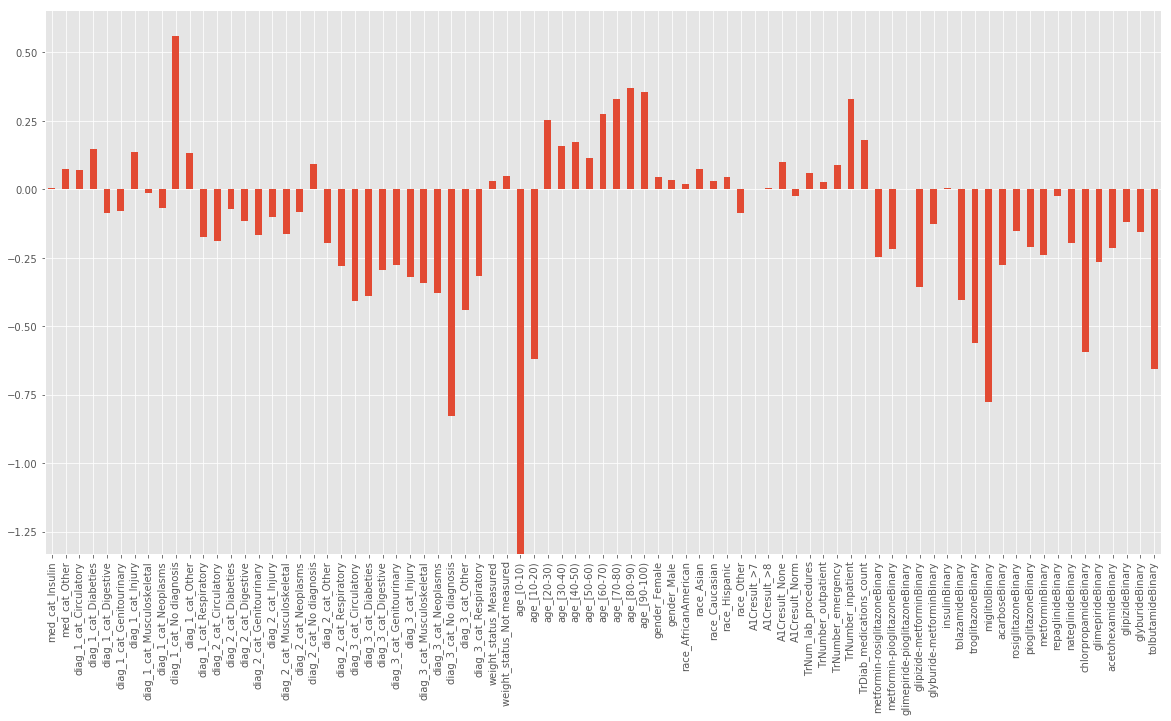

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)
weights = pd.Series(lr_clf.coef_[0],index=diab_wDummies.columns)
weights.plot(kind='bar')
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


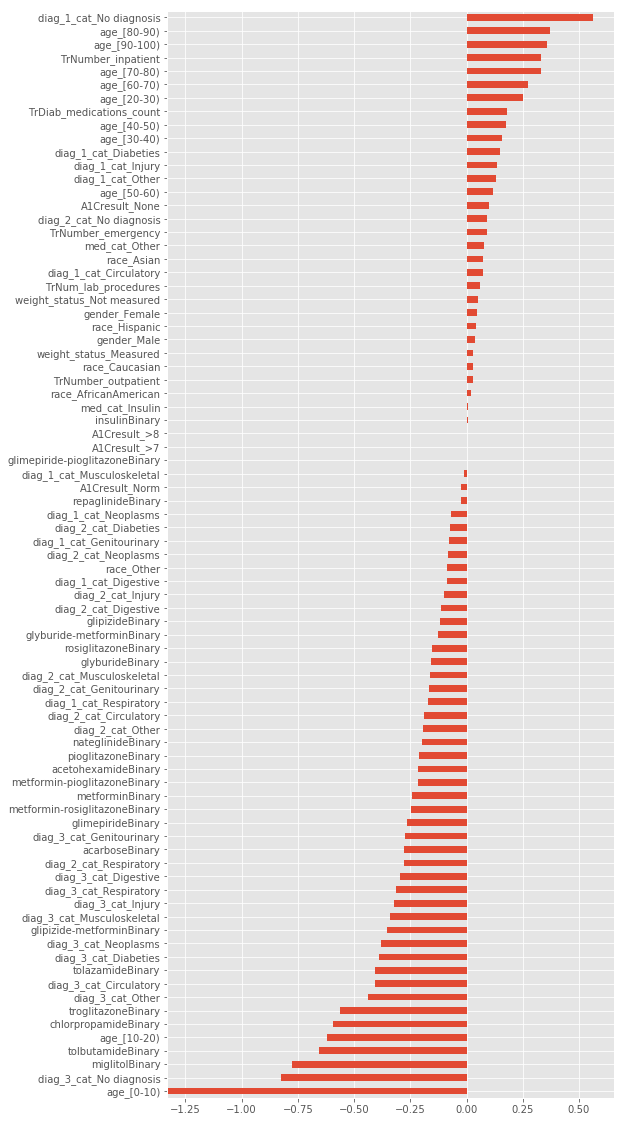

In [14]:
%matplotlib inline

weights = pd.Series(lr_clf.coef_[0],index=diab_wDummies.columns)
weights = weights.order(ascending=True)
weights.plot(kind='barh',figsize=(8,20))
plt.show()

### Weight interpretation

Using the bar chart, we can see that the main drivers are diag_1 with no diagnosis and many of the higher age variables along with TrNumber_impatient.   Total Medication and AICresult also play a strong part of the re-admitted rate.   On the opposite end, we see that most of the individual medication has no values in predicting re-admitted rate. 

<i><b><font color='red' size="8">Feature selection</font></b></i>

Original data shape

In [26]:
X.shape

(101766, 81)

###  Using variance Threshold

In [38]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X1 = sel.fit_transform(X)
print('new shape using variance Threshold ' +str(X1.shape))


new shape using variance Threshold (101766, 16)


Logistic Regression on new reduced dataset

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight={0:0.23, 1:0.77})

cv_accuracies = []
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X1,y)):
    lr_clf.fit(X1[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X1[test_indices]) # get test set precitions
    acc = mt.accuracy_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    cv_accuracies.append(acc)
    # print the accuracy and confusion matrix 
print ('Average accuracy in ' + str(num_cv_iterations) + ' CV iterations:')
print (sum(cv_accuracies)/len(cv_accuracies))
print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

Average accuracy in 5 CV iterations:
0.883138449445
confusion matrix
 [[17940   131]
 [ 2233    50]]


### Using L1-based feature selection

In [44]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# X_new = SelectKBest(chi2, k=2).fit_transform(X1, y)
# X_new.shape


from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X1, y)
model = SelectFromModel(lsvc, prefit=True)
X2 = model.transform(X1)
print('new shape L1-based feature selection ' +str(X2.shape))


new shape L1-based feature selection (101766, 14)


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight={0:0.23, 1:0.77})

cv_accuracies = []
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X2,y)):
    lr_clf.fit(X2[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X2[test_indices]) # get test set precitions
    acc = mt.accuracy_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    cv_accuracies.append(acc)
    # print the accuracy and confusion matrix 
print ('Average accuracy in ' + str(num_cv_iterations) + ' CV iterations:')
print (sum(cv_accuracies)/len(cv_accuracies))
print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

Average accuracy in 5 CV iterations:
0.884730274148
confusion matrix
 [[17963   124]
 [ 2223    44]]


### Tree-based feature selection¶

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X3 = model.transform(X)
print('new shape Tree-based feature selection ' +str(X3.shape))

new shape Tree-based feature selection (101766, 27)


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight={0:0.23, 1:0.77})

cv_accuracies = []
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X3,y)):
    lr_clf.fit(X3[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X3[test_indices]) # get test set precitions
    acc = mt.accuracy_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    cv_accuracies.append(acc)
    # print the accuracy and confusion matrix 
print ('Average accuracy in ' + str(num_cv_iterations) + ' CV iterations:')
print (sum(cv_accuracies)/len(cv_accuracies))
print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

Average accuracy in 5 CV iterations:
0.883688709836
confusion matrix
 [[17946   112]
 [ 2242    54]]


# Modeling

## Random Forest for feature importance

In [1]:
# Divide our features into X and Y for modelling 
X= diab.iloc[::,1:60]
#target variable
y = diab["readmitted"]

NameError: name 'diab' is not defined

## Support Vector Machines

using SVM to test if this method of classification can classify our data set better than logistic regression.

SVM: 0.887638793358
Confusion Matrix:
 [[18067     0]
 [ 2287     0]]
Coefficients [[ -7.17888757e-06   7.17888757e-06  -1.64405265e-04   2.45740879e-05
   -4.30299859e-05  -5.70217982e-05  -4.12886785e-05  -4.73227889e-05
   -1.24781284e-04  -7.36682472e-04   2.77689236e-04   5.60674175e-05
    3.12941513e-04   1.29714472e-04  -1.27241727e-04  -1.57972080e-04
   -1.85490101e-04   8.89631512e-05  -3.57643500e-04  -4.47217229e-04
    6.25806764e-05   2.09106132e-05  -8.88682406e-05  -1.00414471e-04
   -1.47697448e-04  -1.67386412e-04  -4.06742018e-05   3.82973775e-05
   -1.77778230e-05  -6.36379288e-06  -1.93927035e-04  -3.58181397e-04
   -8.85280984e-05   8.85280984e-05  -8.20610282e-04   1.34328267e-04
    9.77131310e-06  -2.95317249e-05  -2.19067105e-04  -2.44088658e-05
    5.39336439e-05   2.43538334e-04  -1.58171327e-04   1.86604192e-04
    3.50003562e-05  -3.50003562e-05   1.97618248e-06  -2.80304177e-04
    5.06361067e-05   5.73863308e-05  -6.76094212e-05  -3.18616725e-05
    4.4

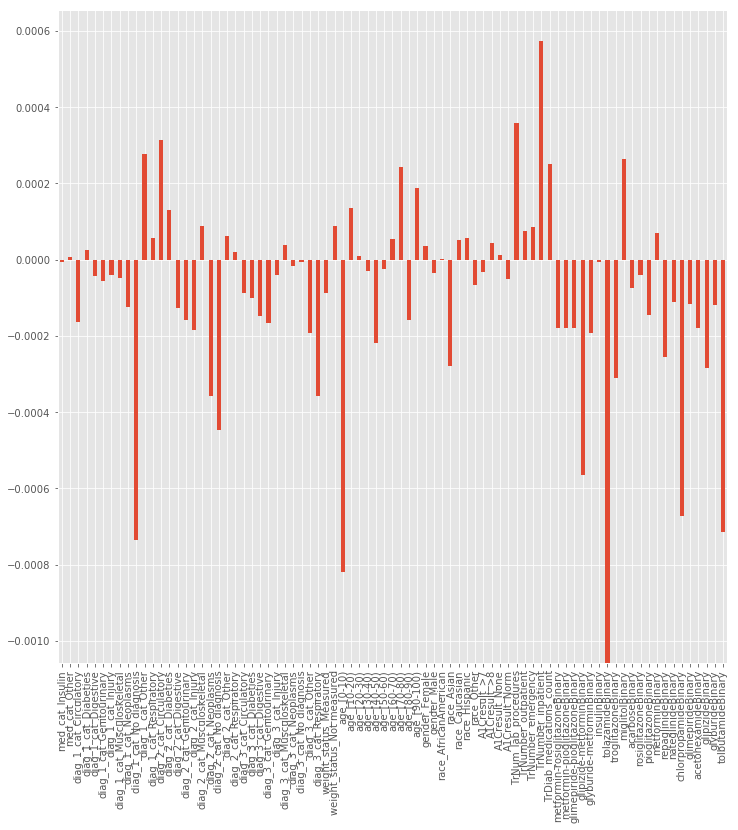

In [239]:
# SVM of full data set
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter("ignore")

# SGDClassifier using 'hinge' for loss to get an SVM
from sklearn.linear_model import SGDClassifier

# Get SVM classifier
regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter=iterations, n_jobs=-1, penalty='l2')

# Fit our data (after it is scaled) to an SVM classification
scl = StandardScaler()
for train_idx, test_idx in cv_obj:
    svm_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = svm_sgd.predict(scl.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('SVM:', acc)
print('Confusion Matrix:\n', conf)
print('Coefficients', svm_sgd.coef_)
weights = pd.Series(svm_sgd.coef_[0],index=diab_wDummies.columns)
weights.plot(kind='bar', figsize=(12,12))

In [262]:
from sklearn.cross_validation import ShuffleSplit

# scl_obj = StandardScaler()
# scl_obj.fit(X_train) 

# for train_indices, test_indices in cv_object: 
#     X_train = diab_Xs[train_indices]
#     y_train = diab_Y[train_indices]
    
#     X_test = diab_Xs[test_indices]
#     y_test = diab_Y[test_indices]
    




Create Cross Validation object with an 80/20 split

In [200]:
# def grid_searcher(X, y, model, params, cv_obj):
#     clf = grid_search.GridSearchCV(model, params, cv=cv_object,n_jobs=-1)
#     clf.fit(X, y)
#     return clf
# logit_clf = grid_searcher(X, y, model, params, cv_object)

# print("The best estimator: ",logit_clf.best_estimator_)
# print("The best accuracy score is: ", logit_clf.best_score_)
# print("The best parameters of model is: ",logit_clf.best_params_)

In [95]:
# # Shuffle split our data into an 80/20 breakdown. The 80 will be used for training and the 20 for testing
# from sklearn.cross_validation import ShuffleSplit

# num_cv_iterations = 5
# num_instances = len(diab_total)
# cv_obj = ShuffleSplit(n = num_instances, n_iter = num_cv_iterations, test_size = 0.2)

# print(cv_obj)


ShuffleSplit(101766, n_iter=5, test_size=0.2, random_state=None)


Defining the target and predicting variables for regression analysis

In [94]:
# diab_total = pd.concat((diab,diab_wDummies), axis= 1)

In [97]:
# diab1 = diab_total.copy(deep=True)
# diab_Y = diab1['readmitted_Group'].values
# diab_Xs = diab.drop('readmitted_Group', axis=1).values

# from numpy import random as rd
# N = len(diab_total) # total number of instances
# permuted_indices = np.permutation(N) # random permutation of the instances
# N_eighty_percent = int(0.8*N)

In [104]:
#    for train_indices, test_indices in cv_obj: 
#         X_train = diab_Xs[train_indices]
#         y_train = diab_Y[train_indices]

#         X_test = diab_Xs[test_indices]
#         y_test = diab_Y[test_indices]